# 🍓 `compote` (Coefficients Of Multipoles of lensing POTEntials)

Author: Natalie B. Hogg

## Introduction

The `compote` package computes coefficients of the multipole expansion of a given lensing potential. This notebook demonstrates its use. Currently `compote` contains the singular isothermal ellipse (SIE) of [Kormann et al. 1993](https://articles.adsabs.harvard.edu/pdf/1994A%26A...284..285K), the elliptical power law (EPL) of [Tessore and Metcalf 2015](https://arxiv.org/pdf/1507.01819.pdf), and the boxy/disky potentials of [van de Vyvere et al. 2021](https://arxiv.org/abs/2112.03932). The singular isothermal sphere (SIS) can be obtained by setting the axis ratio $f$ of the SIE profile close to 1.

## Getting started

First import the potential from `compote` whose multipoles you wish to compute:

In [1]:
from compote.potentials.epl import EPL

Before getting the multipole coefficients, you can calculate the value of the potential for a given value of the angular coordinate $\varphi$ (thanks to the separation of angular and radial coordinates in the definitions of both the SIE and EPL potentials, the result will simply scale with the choice of radial coordinate $\theta$):

In [2]:
epl_fixed_phi = EPL() # get an instance of the EPL class

Choose some values for the parameters:

In [3]:
phi = 0.5 # angular coordinate
theta = 1   # radial coordinate; result will simply scale with this

In [4]:
f = 7/8     # axis ratio of ellipse
theta_E = 1 # Einstein radius
gamma = 2   # slope of the power law

And get the value of the potential:

In [5]:
potential = epl_fixed_phi.potential(phi, theta, f, theta_E, gamma)

print(potential)

(1.0109740712415611+0j)


## Calculation

To calculate the multipole coefficients of a potential, import and initialise the Calculate class:

In [6]:
from compote.calculate.calculate import Calculate

calc = Calculate()

Make a new instance of the potential's class:

In [7]:
epl = EPL()

Choose some values for the parameters:

In [8]:
f = 1/8     
theta_E = 1.4
gamma = 2.3

Choose the number of orders to compute (only even orders can be obtained via e.g. `orders = range(0, 12, 2)`):

In [9]:
orders = range(0, 12)

And get the result:

In [10]:
c_epl, error_epl = calc.coefficients(epl.potential, orders, theta, f, theta_E, gamma)

/home/nataliehogg/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


## Results

You can display the results as a dataframe...

In [11]:
dataframe = calc.results_dataframe(c_epl, error_epl, orders)

print(dataframe)

             c_n         error
0   1.771483e+00  3.138394e-10
1  -6.663892e-17  1.314629e-14
2   1.378917e-01  1.842236e-10
3  -7.060874e-18  1.229814e-14
4  -2.075184e-02  1.468960e-10
5  -3.388410e-16  1.229814e-14
6   6.347818e-03  2.291326e-10
7  -3.684000e-16  1.130864e-14
8  -2.549697e-03  3.450077e-10
9   2.781886e-16  1.187407e-14
10  1.187024e-03  5.709542e-10
11 -5.037472e-16  1.272222e-14


... or as a handy LaTeX table.

In [12]:
latex = calc.results_dataframe(c_epl, error_epl, orders, to_latex=True)

print(latex)

\begin{tabular}{rrr}
\toprule
Order & $c_n$ & Error \\
\midrule
0 & 1.77e+00 & 3.14e-10 \\
1 & -6.66e-17 & 1.31e-14 \\
2 & 1.38e-01 & 1.84e-10 \\
3 & -7.06e-18 & 1.23e-14 \\
4 & -2.08e-02 & 1.47e-10 \\
5 & -3.39e-16 & 1.23e-14 \\
6 & 6.35e-03 & 2.29e-10 \\
7 & -3.68e-16 & 1.13e-14 \\
8 & -2.55e-03 & 3.45e-10 \\
9 & 2.78e-16 & 1.19e-14 \\
10 & 1.19e-03 & 5.71e-10 \\
11 & -5.04e-16 & 1.27e-14 \\
\bottomrule
\end{tabular}



## Multiple potentials

You can obtain the coefficients of the sums of potentials simply by summing the coefficiants of the individual potentials:

In [13]:
from compote.potentials.boxydisky import Boxy

boxy = Boxy()

a_4 = 0.01

c_boxy, error_boxy = calc.coefficients(boxy.potential, orders, theta, a_4)

/home/nataliehogg/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [14]:
c_sum = c_epl + c_boxy

## Plots

And lastly, with the Plot class you can plot the coefficients you calculated:

In [15]:
from compote.plots.plots import Plot

plt = Plot()

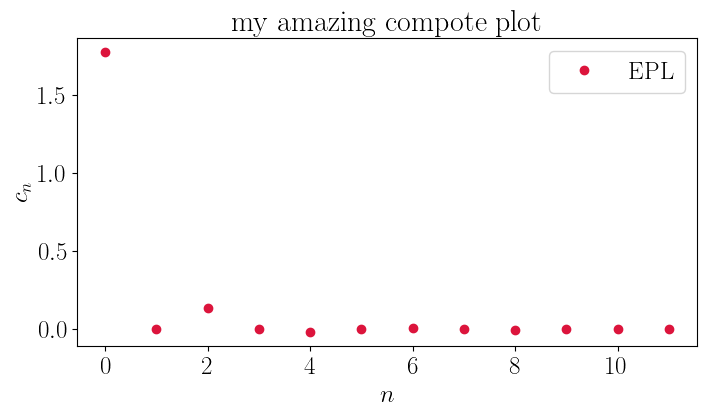

In [16]:
plot_kwargs = {'color': 'crimson', 'ls': ' ', 'marker': 'o', 'label': 'EPL'}

plt.coefficient_plot(c_epl, orders, plot_kwargs, title='my amazing compote plot')

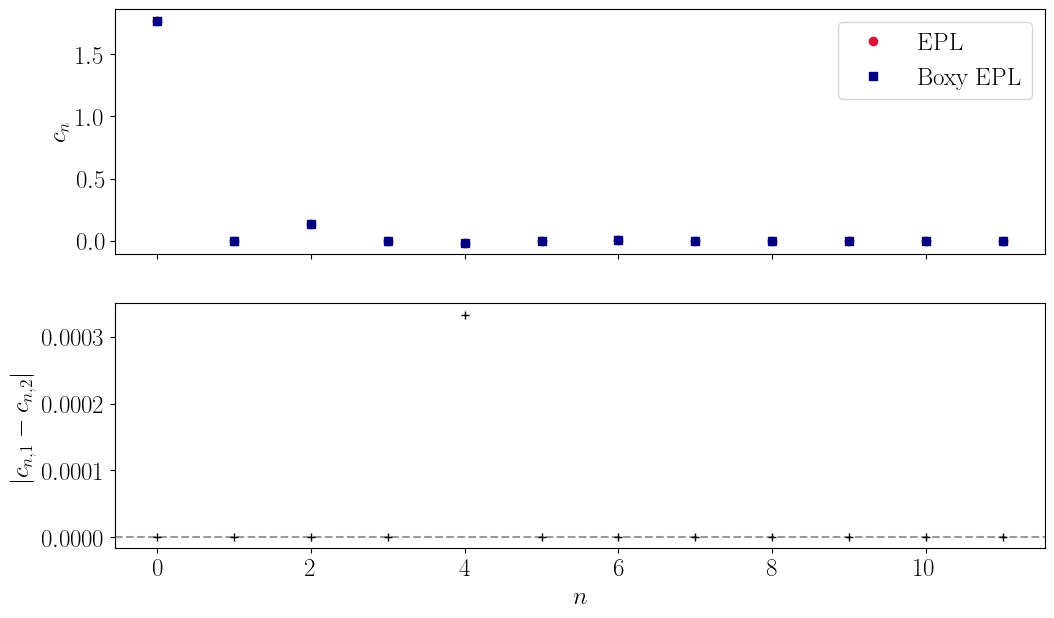

In [17]:
epl_kwargs = {'color': 'crimson', 'ls': ' ', 'marker': 'o', 'label': 'EPL'}
epl_boxy_kwargs = {'color': 'navy', 'ls': ' ', 'marker': 's', 'label': 'Boxy EPL'}
difference_kwargs = {'color': 'black', 'ls': ' ', 'marker': '+'}

plt.difference_plot(c_epl, c_sum, orders, epl_kwargs, epl_boxy_kwargs, difference_kwargs)